In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df= pd.read_csv('/content/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


## Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
#filling rating with mean
df['Rating']=df['Rating'].fillna(df['Rating'].mean())

In [6]:
#dropping null values
df.dropna(inplace=True)

In [7]:
#checking again
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Visualization

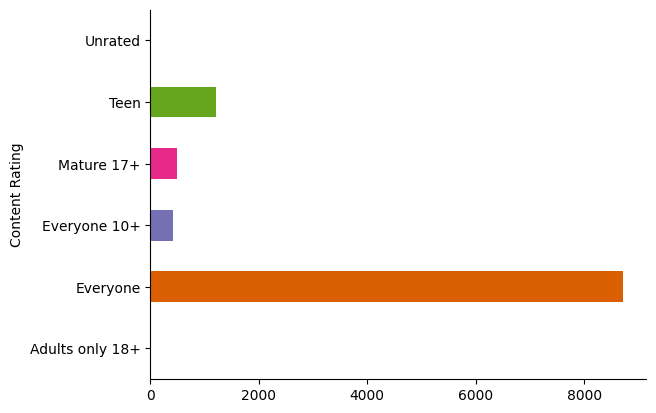

In [8]:
# @title Content Rating

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Content Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Univariate Analysis

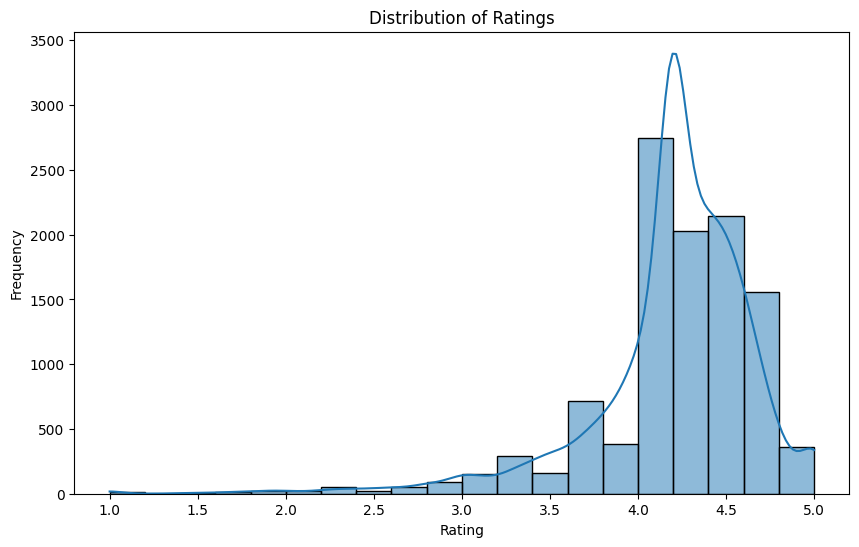

In [11]:
#distribution of ratings


# Univariate Analysis: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


## Bivariate Analysis

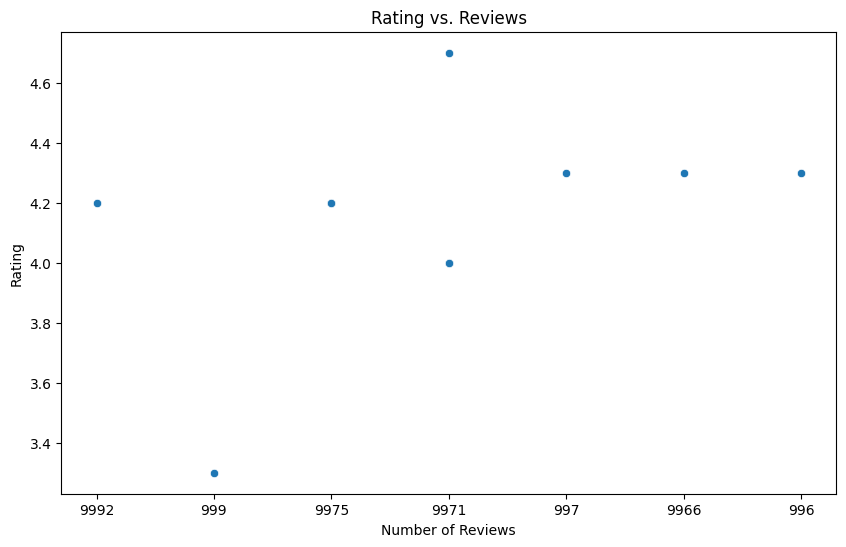

In [18]:
# Bivariate Analysis: Relationship between Rating and Reviews
top_10_reviews = df.sort_values(by='Reviews', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=top_10_reviews)
plt.title('Rating vs. Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()


## Multivariate Analysis

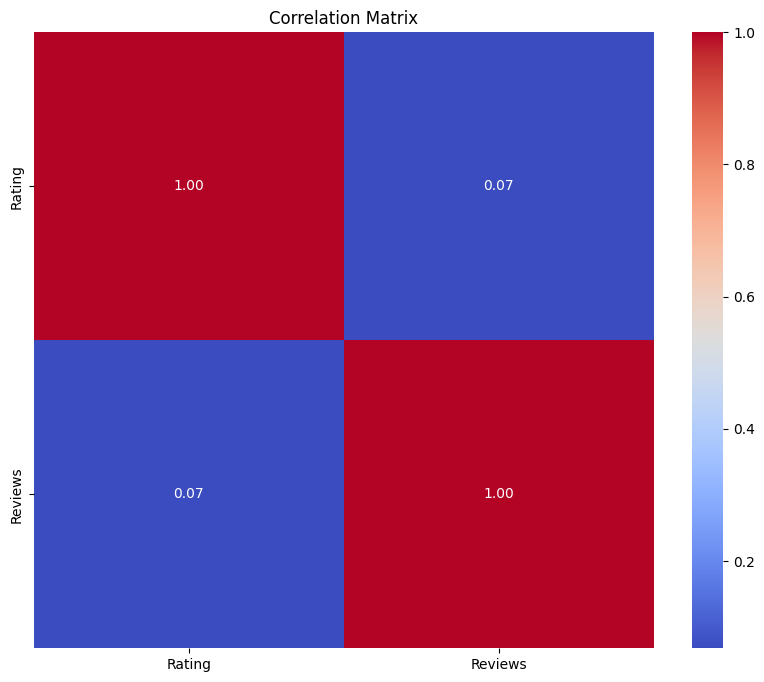

In [26]:
# Multivariate Analysis: Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[['Rating', 'Reviews']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



## Feature Engineering

In [31]:
# Convert 'Reviews' and 'Installs' columns to numeric types
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Price' column to numeric type
df['Price'] = df['Price'].str.replace('$', '').astype(float)

In [32]:
# Review to Install Ratio
df['Review_to_Install_Ratio'] = df['Reviews'] / df['Installs']

# Price Category
df['Price_Category'] = pd.cut(df['Price'], bins=[0, 1, 5, 10, 50, 100, df['Price'].max()], labels=['Free', 'Low', 'Medium', 'High', 'Very High', 'Premium'])


## Insights Extraction

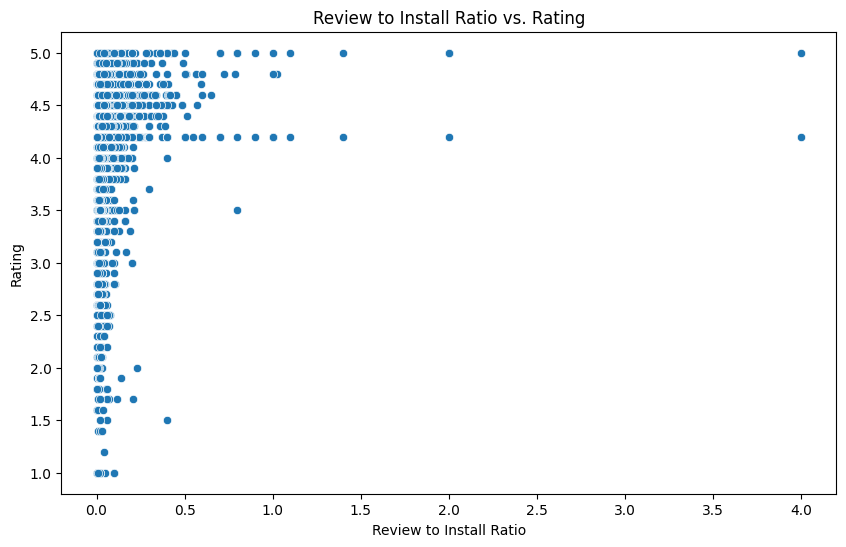

In [33]:
# Analyze the impact of Review to Install Ratio on Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Review_to_Install_Ratio', y='Rating', data=df)
plt.title('Review to Install Ratio vs. Rating')
plt.xlabel('Review to Install Ratio')
plt.ylabel('Rating')
plt.show()



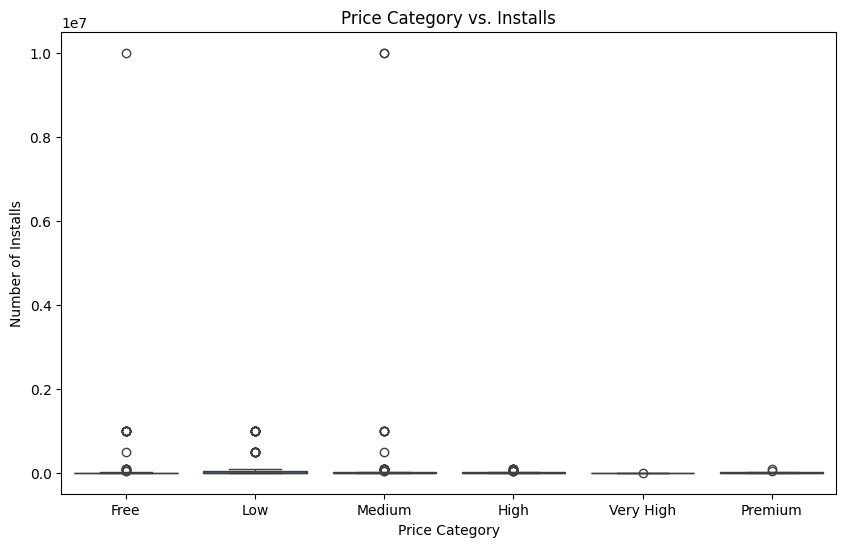

In [34]:
# Analyze the impact of Price on Installs
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price_Category', y='Installs', data=df)
plt.title('Price Category vs. Installs')
plt.xlabel('Price Category')
plt.ylabel('Number of Installs')
plt.show()
